# Maternal Health Risk in Rural Areas

Pregnancy is a long jounrney and can and there's a possibility that the mother could have complications during the stages of pregnancy. This analysis is an effort to explore the factors which can help us to detect any maternal health risk. This can be useful in taking measures of treatment especially in rural areas.

## What's the data in hand?

Data Source : https://archive.ics.uci.edu/dataset/863/maternal+health+risk

Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system. This data has been posted to the UCI Machine Learning Repository. 

Citation: Ahmed,Marzia. (2023). Maternal Health Risk. UCI Machine Learning Repository. https://doi.org/10.24432/C5DP5D.

## Analysis Structure
Following is an broad understanding of the process and then we shall go in detail:

- Broad Analysis
- Data Cleaning
- Univariate Analysis
- Multivariate Analysis


## 1. Broad Analysis 

### 1.1 Importing Modules

Importing all the required modules for the analysis.

In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

### 1.2 Loading the dataset

Loading the raw dataset which is in the form of a csv file into a pandas dataframe.

In [53]:
df = pd.read_csv('data/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Here, the columns indicate the factors through which we can detect maternal health risk. The rows are individual observations taken through the IoT based risk monitoring system.

Let's check the shape of the dataset.

In [54]:
df.shape

(1014, 7)

So here we have total 7 features and 1014 observations.

Let's check the columns of the dataset.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Following are the features used in this dataset:

- **Age**: Age of the patient.
- **SystolicBP**: Systolic Blood Pressure of the Patient.
- **DiastolicBP**: Diastolic BLood Pressure of the Patient.
- **BS** : Blood Sugar(glucose) levels.
- **BodyTemp** : Body Temperature at the time of observation.
- **HeartRate** : Heart Rate at the time of observation.
- **RiskLevel** : Categorical Target feature predicting the risk level.

## 2. Data Cleaning

Since this dataset is raw, there might be a chance of having it having duplicates and missing values. So, we'll be performing checks and will be taking adequate measures to deal with any data related issues.

### 2.1 Checking any duplicates

First, we'll be checking for any duplicate records.

In [56]:
df.duplicated().sum()

562

That's quite a lot of duplicates in this dataset. Let's check the distinct values in the dataset

In [57]:
df.value_counts()

Age  SystolicBP  DiastolicBP  BS    BodyTemp  HeartRate  RiskLevel
19   120         80           7.0   98.0      70         mid risk     27
48   120         80           11.0  98.0      88         high risk    14
31   120         60           6.1   98.0      76         mid risk     13
40   160         100          19.0  98.0      77         high risk    10
55   140         95           19.0  98.0      77         high risk    10
                                                                      ..
25   120         90           6.9   98.0      70         low risk      1
                                              80         low risk      1
                              7.5   98.0      80         low risk      1
                 100          6.8   98.0      60         low risk      1
70   85          60           6.9   102.0     70         low risk      1
Name: count, Length: 452, dtype: int64

As we can see, there are a lot of duplicate values for certian entries. Let's see the distributution of the target variables in the original dataset.

In [58]:
df['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

The original database seems to be quite balanced among the classes. Let's try to remove all the duplicates and then check the target feature distribution.

In [59]:
df1 = df.drop_duplicates()
df1.shape, df1['RiskLevel'].value_counts()

((452, 7),
 RiskLevel
 low risk     234
 high risk    112
 mid risk     106
 Name: count, dtype: int64)

There isn't a huge change in the terms of the distribution, so I am going to continue with removing all the duplicate values from the original dataset.

In [60]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

**All the duplicates have been removed!!**

### 2.2 Checking Missing Values

Since we have taken care of the duplicate values now, we can now check for the missing values in the dataset, if any.

In [61]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

**There are no  missing values!!**

## 3. Data Exploration

### 3.1 Checking number of numerical and categorical features

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


### Insights
- Out of the given seven features, six of them are numerical features.
- The last feature is categorical and it appears to be the target feature.

### 3.2 Checking the statistics of the numerical features

In [63]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### Insights
- The mean age appears to be skewed to the right.
- The standard deviations for blood sugar levels and temparature seem to be very low. 
- Max age of 70 and min age of 10 causes a very significant amount of concern.


### 3.3 Checking the labels of the categorical features

In [64]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

### Insights

There are three levels of Risk level mentioned:
- High risk
- Low risk
- Mid risk

This feature is confirmed to be the target feature to predict.

## 4 Univariate Analysis

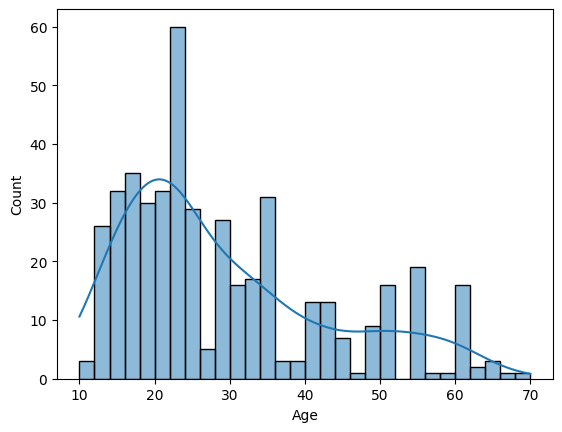

In [65]:
sns.histplot(df, x= df['Age'], kde= True, bins= 30)
plt.show()

### Insights
- Data is not distributed normally.
- There's a significantly higher amount of teenage pregnancies.

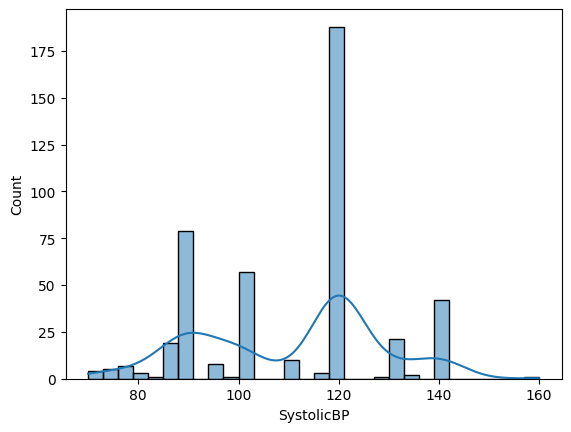

In [66]:
sns.histplot(df, x= df['SystolicBP'], kde= True, bins= 30)
plt.show()

### Insights
- Data not distributed normally.
- There appears to be two peaks in this distribution.

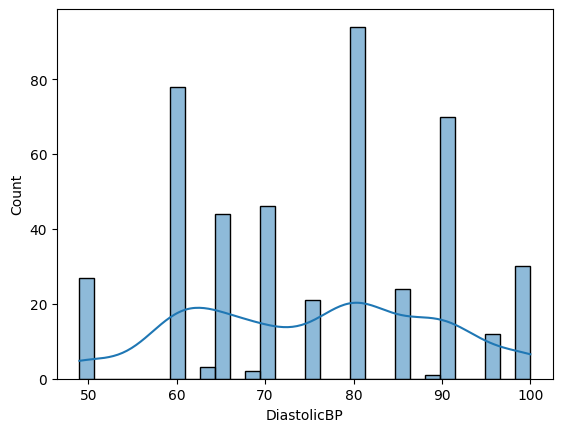

In [67]:
sns.histplot(df, x= df['DiastolicBP'], kde= True, bins= 30)
plt.show()

### Insights
- It's very much spread out but still doesn't represent a normal distribution

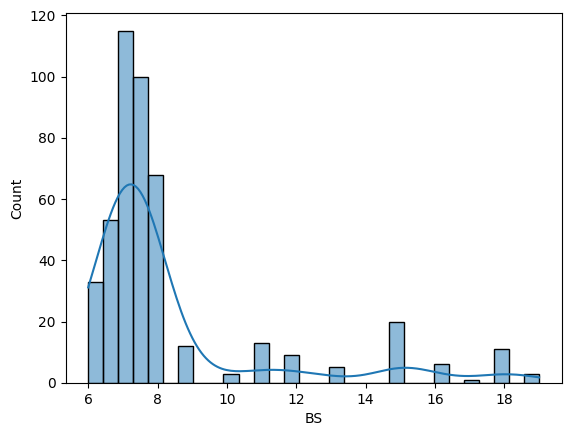

In [68]:
sns.histplot(df, x= df['BS'], kde= True, bins= 30)
plt.show()

### Insights
- Data heavily skewed to the right.
- Majority of the datapoints are at the left side.

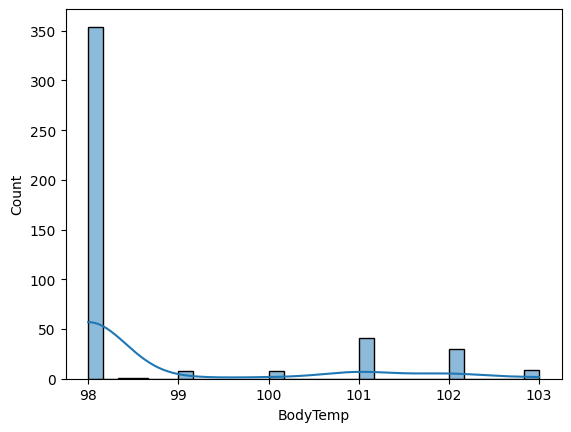

In [69]:
sns.histplot(df, x= df['BodyTemp'], kde= True, bins= 30)
plt.show()

### Insights
- Follows the same trend as the blood sugar samples

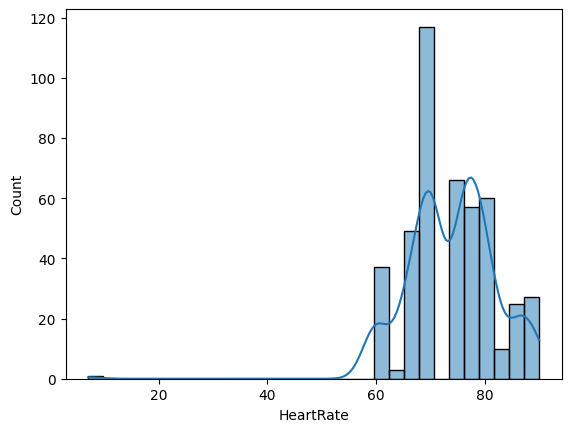

In [70]:
sns.histplot(df, x= df['HeartRate'], kde= True, bins= 30)
plt.show()

### Insights
- Data isn't normally distributed.
- Scaling is definitely a matter to consider.

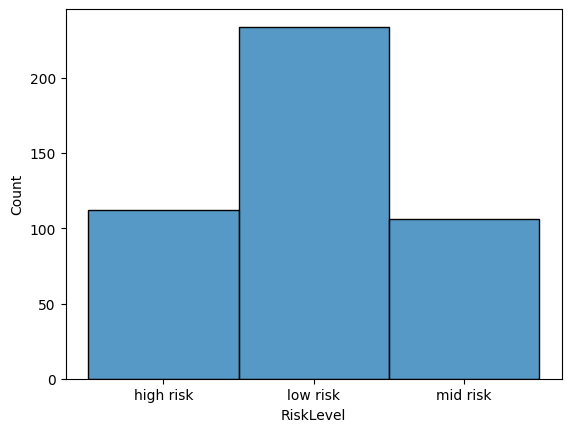

In [71]:
sns.histplot(df, x= df['RiskLevel'])
plt.show()

## Insights
- Data seems considerably imbalanced towards the low risk levels.
- There's a need to downsample the low risk level data before training the model.

## 5 Multivariate Analysis

First, let's visualize the relationship between each numerical feature and the categorical feature.

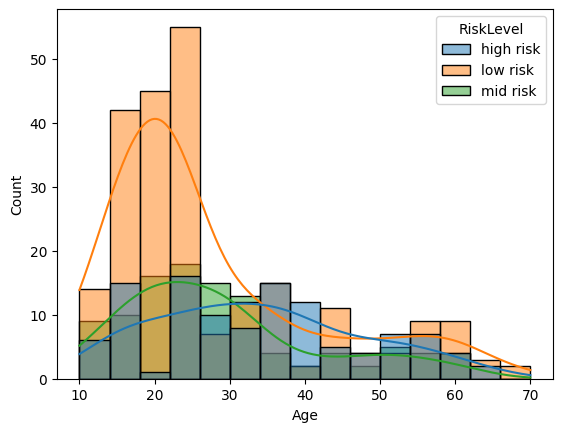

In [72]:
sns.histplot(data=df,x='Age',kde=True,hue='RiskLevel')
plt.show()

### Insights
- The general distributions seem to be consistent among all classes.
- High risk cases seem to have a different mean value than the others.

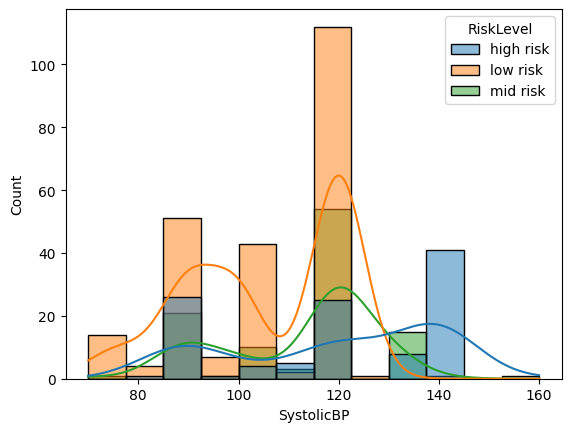

In [73]:
sns.histplot(data=df,x='SystolicBP',kde=True,hue='RiskLevel')
plt.show()

### Insights
- Higher systolic BP cases seem to have higher risk 
- Lower cases dominate the dataset

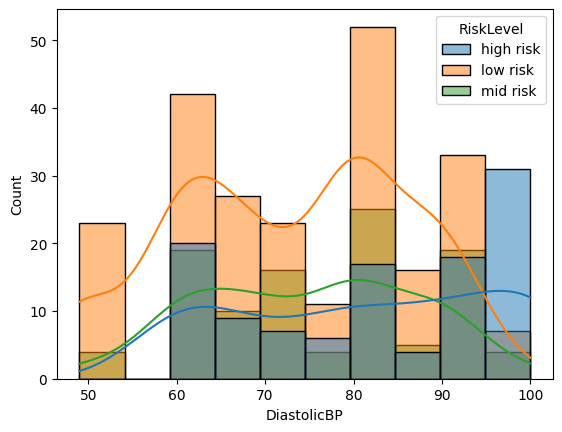

In [74]:
sns.histplot(data=df,x='DiastolicBP',kde=True,hue='RiskLevel')
plt.show()

### Insights
- Follows the same observation trend as the systolic BP trends.

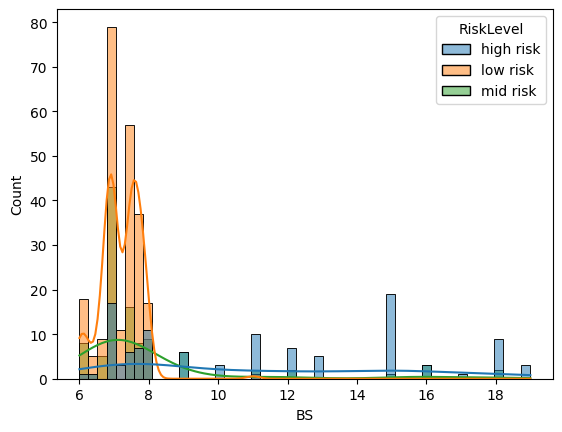

In [75]:
sns.histplot(data=df,x='BS',kde=True,hue='RiskLevel')
plt.show()

### Insights
- Higher amounts of blood sugar levels are consistent with higher risk cases.

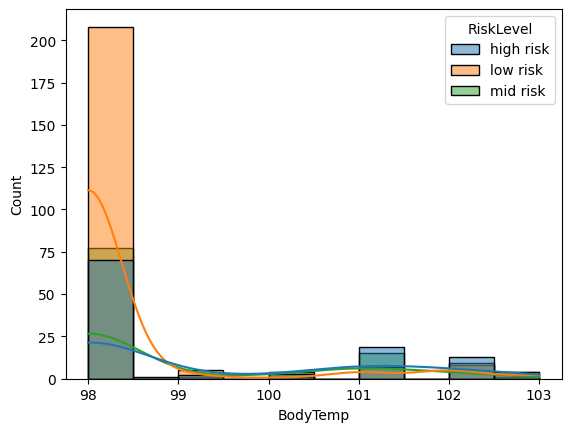

In [76]:
sns.histplot(data=df,x='BodyTemp',kde=True,hue='RiskLevel')
plt.show()

### Insights
- Majority of the cases have normal temperature.
- Higher temperatures tend to indicate higher risks.

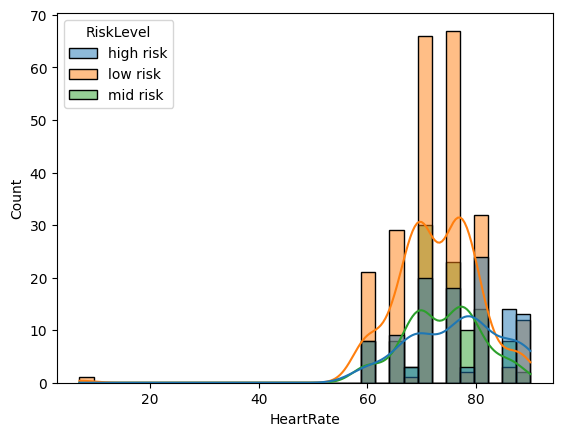

In [77]:
sns.histplot(data=df,x='HeartRate',kde=True,hue='RiskLevel')
plt.show()

### Insights
- Extremely high heart rate is tending to higher risk of cases.

Now, let's try to have a pairplot for all features to check all combinations of features and the possible relationships among them.

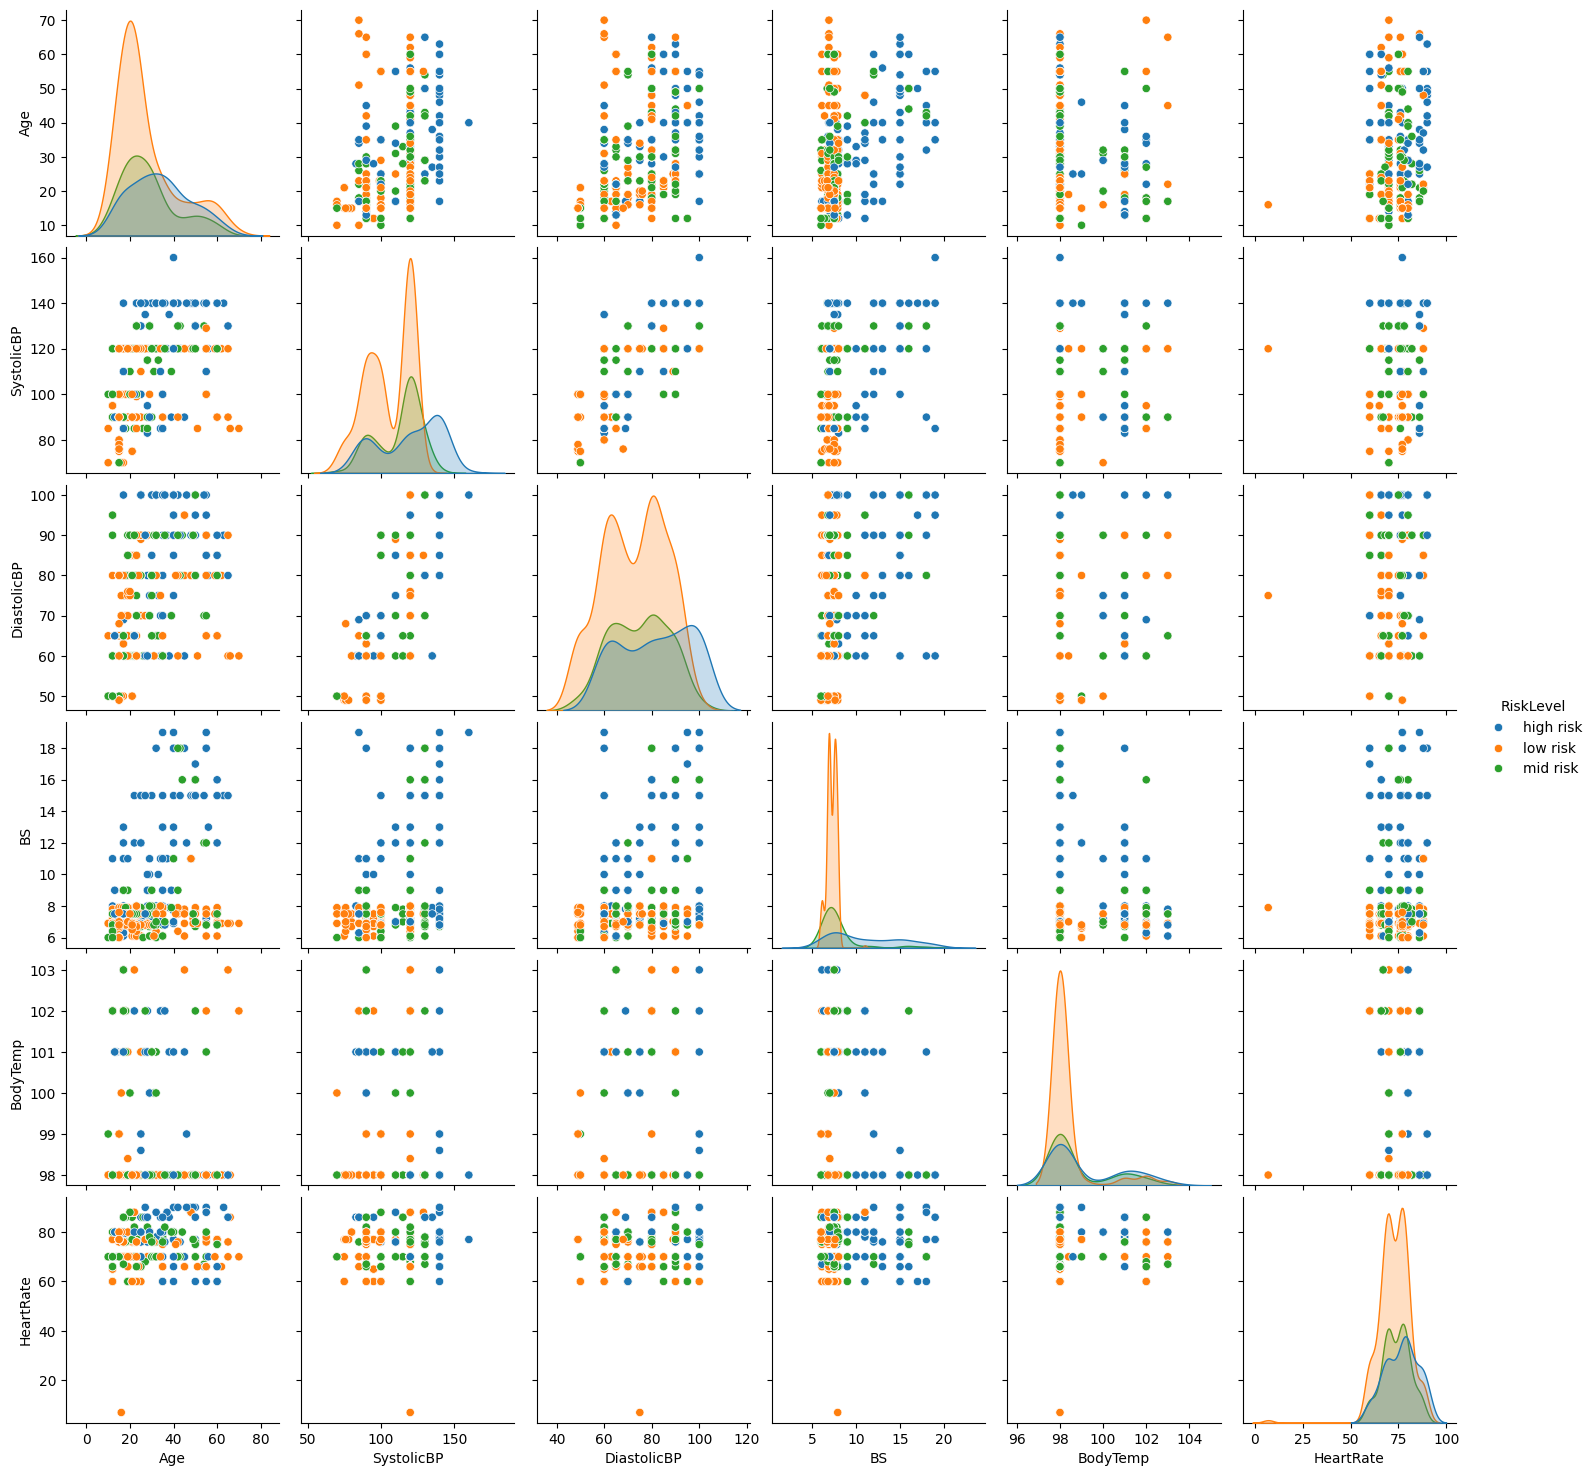

In [79]:
sns.pairplot(df, hue= 'RiskLevel')
plt.show()

Some cases are tending to show some kind of relationship but at this stage, it's not sure how.

Let's check the pearson coefficients of each combination of features to check the correlation between the features

In [84]:
df.iloc[:,:-1].corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000


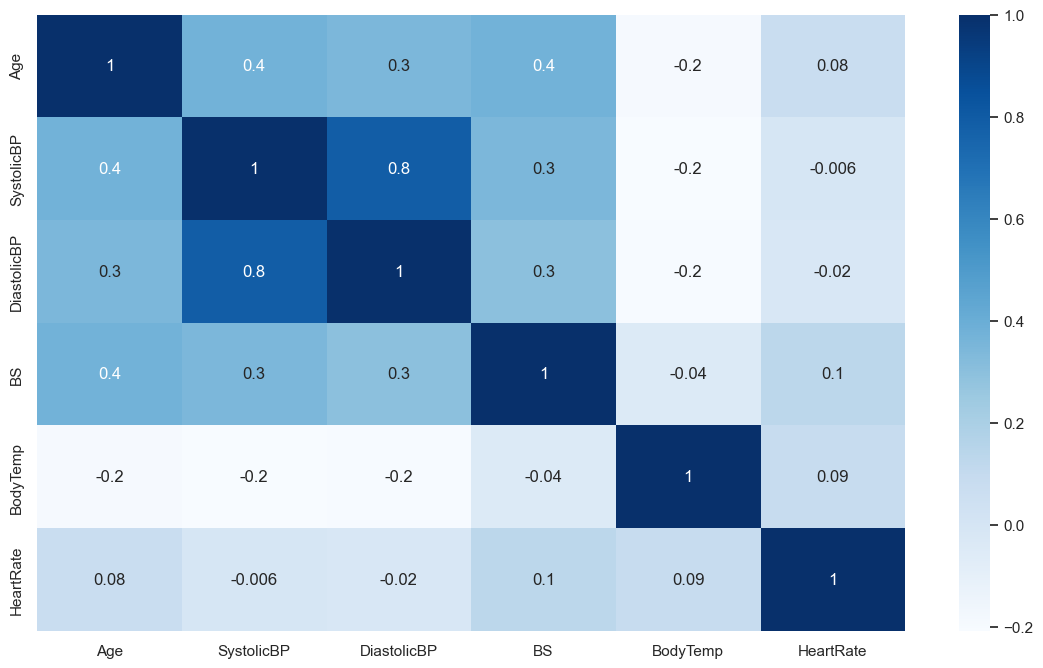

In [85]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.iloc[:,:-1].corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

We can see a very strong correlation between the systolic and the diastolic levels of blood pressure. And both these levels of BP along with the blood glucose levels have a decent amount of correlation with age.

## 6. Checking Outliers

Finally, we will check the amount of outliers present for each feature.

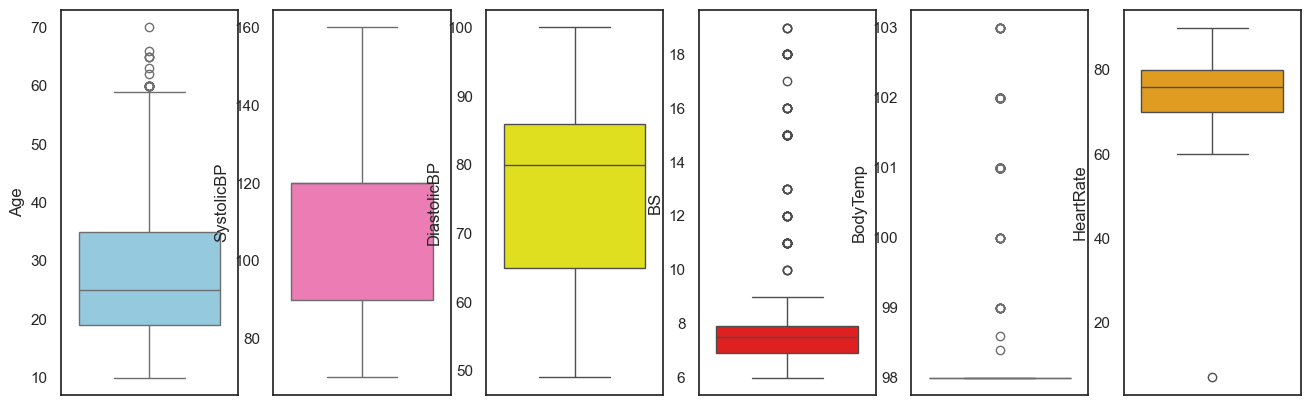

In [86]:
plt.subplots(1,6,figsize=(16,5))
plt.subplot(161)
sns.boxplot(df['Age'],color='skyblue')
plt.subplot(162)
sns.boxplot(df['SystolicBP'],color='hotpink')
plt.subplot(163)
sns.boxplot(df['DiastolicBP'],color='yellow')
plt.subplot(164)
sns.boxplot(df['BS'],color='red')
plt.subplot(165)
sns.boxplot(df['BodyTemp'],color='violet')
plt.subplot(166)
sns.boxplot(df['HeartRate'],color='orange')
plt.show()

### Loading the modified dataset into a csv file

The data is now ready to be saved into a csv file.

In [87]:
df.to_csv('data/maternal_health_risk_new.csv', index= False)